<a href="https://colab.research.google.com/github/swanny0000/ZTM-TensorFlow/blob/master/01_neural_network_with_regression_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Regression with Neural Networks in Tensorflow

Predicting numerical variable based on some other combination of variables

In [ ]:
#Import Tensorflow
import tensorflow as tf
print(tf.__version__, tf.config.list_physical_devices())

2.14.0 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


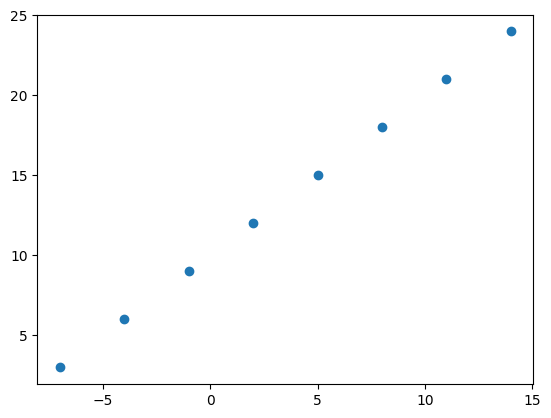

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize!
plt.scatter(X, y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#let's try to get our neural network to learn this!
#input shape: 1 (since it's 1 value per "test")
#output shape: 1 (one target value)

In [ ]:
#but right now, our vector shapes aren't 1...
X.shape, y.shape

((8,), (8,))

In [ ]:
#remember that scalars are technically 0 shape...
X[0].shape, X[0].ndim

((), 0)

In [ ]:
#Turn out arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in tensorflow
1. **Create a model** - define input, output, and hidden layers
2. **Compile the model** - define the loss funciton, the optimizer, and evaluation metrics
3. **Fit the model** - run the model over training data
4. **Evaluate the model** - run the model on testing data to confirm training

In [ ]:
tf.random.set_seed(42)

#1. create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(
  loss=tf.keras.losses.mae,
  optimizer=tf.keras.optimizers.SGD(),
  metrics=["mae"]
)

#3. fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) #epochs are how many times to iterate when training the model

Epoch 1/5
1/1 [==============================] - 0s 472ms/step - loss: 17.8824 - mae: 17.8824
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 17.6012 - mae: 17.6012
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 17.3199 - mae: 17.3199
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 17.0387 - mae: 17.0387
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 16.7574 - mae: 16.7574


In [ ]:
# check out X and y in our trained model!
model.predict([17.0]) #we know that this should be 27

1/1 [==============================] - 0s 164ms/step


array([[-12.119211]], dtype=float32)

On average, our model is ~10.4 points wrong! how can we improve our model?
## Improving a model
1. **Creating a model** - add more layers, increase number of hidden neurons, change the activation function of each layer
2. **Compiling a model** - change the optimization function (try to make it learn faster, with bigger jumps)
3. **Fitting a model** - use more epochs to let it train for longer, or give it more training data to learn from

In [ ]:
'''
#let's compare to a larger model

#1. create the model - more hidden layers, change the activation function
model_large = tf.keras.Sequential()
model_large.add(tf.keras.layers.Dense(100, activation="relu"))
model_large.add(tf.keras.layers.Dense(100, activation="relu"))
model_large.add(tf.keras.layers.Dense(100, activation="relu"))
model_large.add(tf.keras.layers.Dense(1))

#2. compile the model - control over the optimization function and learning rate
model_large.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=["mae"]
)

#3. fit the model - more epochs
# we can start training with a smaller subset to train faster, and then train with a larger training subsets
model_large.fit(X_train_full, y_train_full, epochs=100)
'''

'\n#let\'s compare to a larger model\n\n#1. create the model - more hidden layers, change the activation function\nmodel_large = tf.keras.Sequential()\nmodel_large.add(tf.keras.layers.Dense(100, activation="relu"))\nmodel_large.add(tf.keras.layers.Dense(100, activation="relu"))\nmodel_large.add(tf.keras.layers.Dense(100, activation="relu"))\nmodel_large.add(tf.keras.layers.Dense(1))\n\n#2. compile the model - control over the optimization function and learning rate\nmodel_large.compile(\n    loss=tf.keras.losses.mae,\n    optimizer=tf.keras.optimizers.Adam(lr=0.0001),\n    metrics=["mae"]\n)\n\n#3. fit the model - more epochs\n# we can start training with a smaller subset to train faster, and then train with a larger training subsets\nmodel_large.fit(X_train_full, y_train_full, epochs=100)\n'

In [ ]:
#what is we just ran the above model with more epochs?
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 17ms/step - loss: 16.4762 - mae: 16.4762
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 16.1949 - mae: 16.1949
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 15.9137 - mae: 15.9137
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 15.6324 - mae: 15.6324
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 15.3512 - mae: 15.3512
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 15.0699 - mae: 15.0699
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 14.8179 - mae: 14.8179
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 14.6854 - mae: 14.6854
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.5529 - mae: 14.5529
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 14.4204 - mae: 14.4204
Epoch 11/100
1/1 [==============================] -

In [ ]:
print(X, y)
print(model.predict([17])) #should be 27...

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)
1/1 [==============================] - 0s 59ms/step
[[29.835785]]


In [ ]:
#can we make it better?
tf.random.set_seed(42)

#1. create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1))

#2. compile the model
model.compile(
  loss=tf.keras.losses.mae,
  optimizer=tf.keras.optimizers.SGD(),
  metrics=["mae"]
)

#3. fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=25) #epochs are how many times to iterate when training the model

Epoch 1/25
1/1 [==============================] - 1s 516ms/step - loss: 12.7052 - mae: 12.7052
Epoch 2/25
1/1 [==============================] - 0s 9ms/step - loss: 12.3937 - mae: 12.3937
Epoch 3/25
1/1 [==============================] - 0s 11ms/step - loss: 12.0572 - mae: 12.0572
Epoch 4/25
1/1 [==============================] - 0s 10ms/step - loss: 11.6859 - mae: 11.6859
Epoch 5/25
1/1 [==============================] - 0s 14ms/step - loss: 11.2705 - mae: 11.2705
Epoch 6/25
1/1 [==============================] - 0s 10ms/step - loss: 10.7997 - mae: 10.7997
Epoch 7/25
1/1 [==============================] - 0s 12ms/step - loss: 10.2596 - mae: 10.2596
Epoch 8/25
1/1 [==============================] - 0s 10ms/step - loss: 9.6446 - mae: 9.6446
Epoch 9/25
1/1 [==============================] - 0s 9ms/step - loss: 8.9485 - mae: 8.9485
Epoch 10/25
1/1 [==============================] - 0s 11ms/step - loss: 8.2004 - mae: 8.2004
Epoch 11/25
1/1 [==============================] - 0s 15ms/step - 

In [ ]:
#why is the mae bouncing up and down? too big of learning rate, or our model is overfitting
#also, metrics from training isn't always what you'll see in the real world, too
model.predict([17]) #should be 27

1/1 [==============================] - 0s 76ms/step


array([[33.52287]], dtype=float32)

In [ ]:
#Learning rate is the most important parameter, often
tf.random.set_seed(42)

#1. create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1))

#2. compile the model
model.compile(
  loss=tf.keras.losses.mae,
  optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
  metrics=["mae"]
)

#3. fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100) #epochs are how many times to iterate when training the model

Epoch 1/100
1/1 [==============================] - 1s 707ms/step - loss: 11.1329 - mae: 11.1329
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5831 - mae: 10.5831
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0126 - mae: 10.0126
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4385 - mae: 9.4385
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9498 - mae: 8.9498
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4540 - mae: 8.4540
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.9366 - mae: 7.9366
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3940 - mae: 7.3940
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8304 - mae: 6.8304
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.2343 - mae: 6.2343
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - los

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 70ms/step


array([[26.938559]], dtype=float32)

## Evaluating a model
In practice, you'll typically:
`build a model -> fit it -> evaluate -> tweak -> fit it -> evaluate -> ...`

hyperparameters are what we actually code - the learning rate, optimization/loss/evaluation funcitons, etc

When evaluating models, always visualize!
* Visualize the data
* Visualize the model
* Visualize the training (how it performs while it trains)
* Visualize the predictions (what we did above)

In [ ]:
#let's make a bigger dataset
X = tf.range(-100, 100, 4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

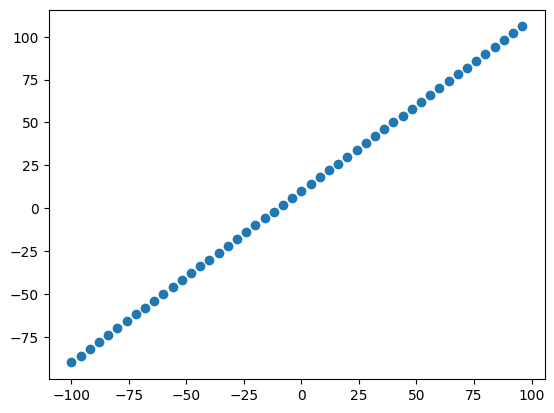

In [ ]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The three sets...
1. The training set (typically 70-80% of the total data available)
2. Validation set (~10-15% of total data available, used to tune the model)
3. Test set (~10-15% of total data, used to test what the model has actually learned)

If you're going to drop a set, drop the validation set

In [ ]:
#how much data to we have?
len(X)

50

In [ ]:
#split into train and test sets
X_train = X[:40]  #first 40 is 80% of data
X_test = X[40:] #last 10 is 20% of data
y_train = y[:40]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

Now we've got data in training and test sets - let's take a look

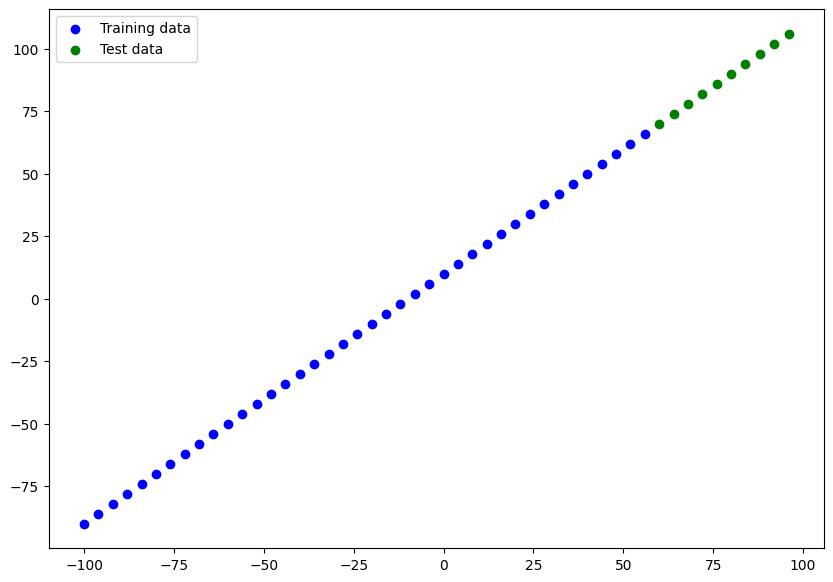

In [ ]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend()

In [ ]:
# let's build the neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=[1]))

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [ ]:
#what does the model look like?
#note that because we haven't fit this model before visualizing, we needed to specify the input shape above
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params: total number of parameters in the model. How many patterns will our model try to learn
* Trainable parameters: parameters that the model can update as it trains. This can be useful when we import a pre-trained model that we want to add a few parameters to.
* Non-Trainable parameters: parameters that the model cannot update, often from **transfer learning**.

In [ ]:
#there are often two trainable layers per hidden neuron... weights and biases

#for now, let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

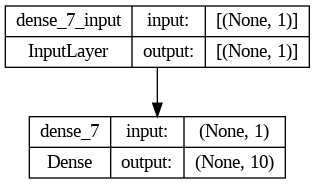

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

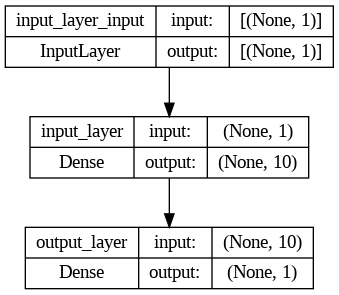

In [ ]:
#How can we make this prettier?
import matplotlib.pyplot as plt
import tensorflow as tf
model = tf.keras.Sequential(name="named_model")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "named_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Visualizing a model's predictions

To visualize predictions, we can plot them against their labels, often listed as `y_test` or `y_true` versus `y_pred`

1/1 [==============================] - 0s 36ms/step


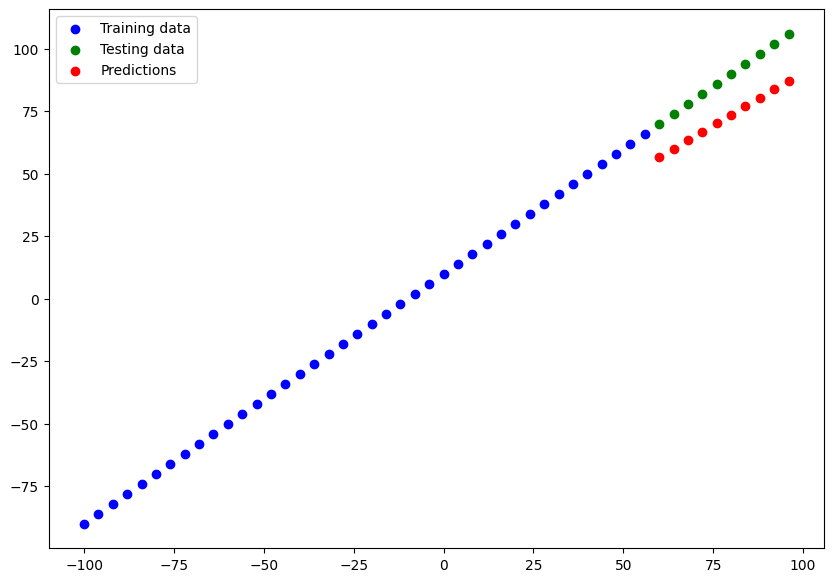

In [ ]:
#make predictions
y_pred = model.predict(X_test)

#create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training and test data and compares predictions to test labels
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200, verbose=0)
plot_predictions()

### Evaluating a model's predictions using Evaluation Metrics

In regression models, two main metrics:
* **MAE**: mean absolute error. On average, how wrong is each of my model's predictions?
* **MSE**: mean square error. Same as MAE, but each value is squared! *Useful when larger errors are more significant than small errors*.

In [ ]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 16.0846 - mae: 16.0846


[16.08461570739746, 16.08461570739746]

In [ ]:
#how can we generate these metrics on our own?
print(y_test.shape, y_pred.shape)
print("Because these are different shapes, they'll act weird")

tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

(10,) (10, 1)
Because these are different shapes, they'll act weird


<tf.Tensor: shape=(), dtype=float32, numpy=16.084614>

In [ ]:
#what about the mean squared error?
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=261.82535>

How do we minimize the model's error?
### Running experiments to improve our model!
`build a model -> fit it -> evaluate -> tweak -> fit it -> evaluate -> ...`

1. Get more data. get more examples to train on.
2. Make your model larger. May come in the form of more layers of more hidden units.
3. Train for longer.


Let's look at 3 tests:
1. OG model, 1 layer, train for 100 epochs
2. 2 layers, train for 100 epochs
3. 2 layers, train for 500 epochs

In [ ]:
X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

1/1 [==============================] - 0s 42ms/step


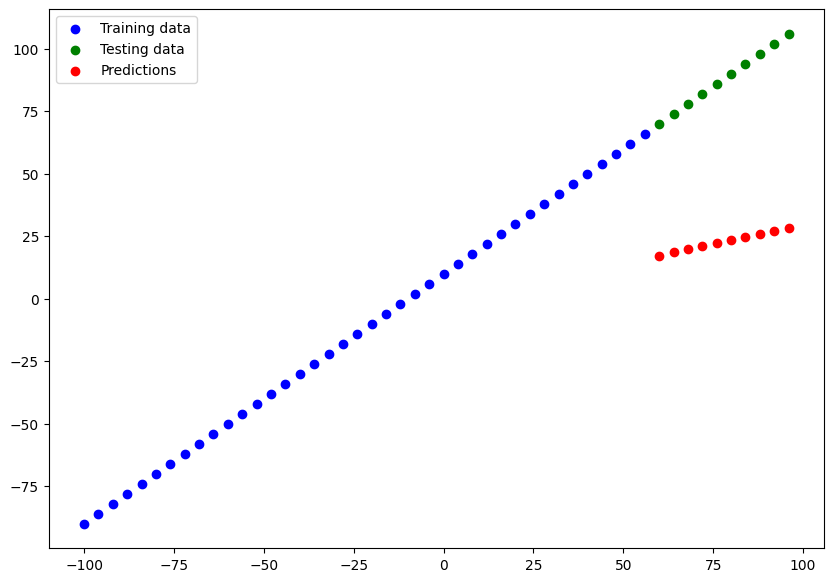

In [ ]:
#Let's refresh our model and plot it
tf.random.set_seed(42)
model_1 = tf.keras.Sequential( name="my_model")
model_1.add(tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"))

model_1.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    metrics=["mae", "mse"]
)

model_1.fit(X_train, y_train, epochs=100, verbose=0)

y_pred_1 = model_1.predict(X_test)

plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred_1
                 )

1/1 [==============================] - 0s 51ms/step


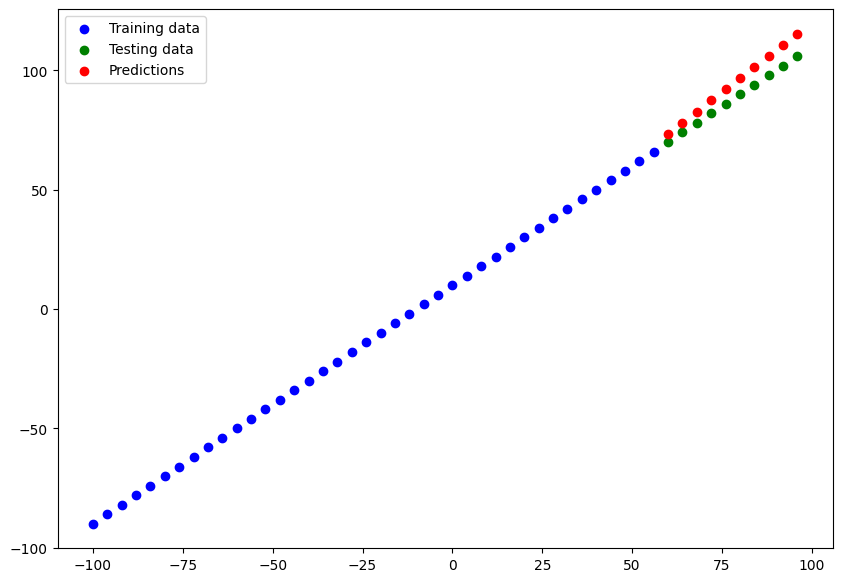

In [ ]:
#Let's refresh our model and plot it
tf.random.set_seed(42)
model_2 = tf.keras.Sequential( name="my_model")
model_2.add(tf.keras.layers.Dense(20, input_shape=[1], name="input_layer"))
model_2.add(tf.keras.layers.Dense(1, activation="relu", name="output_layer"))

model_2.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    metrics=["mae", "mse"]
)

model_2.fit(X_train, y_train, epochs=100, verbose=0)

y_pred_2 = model_2.predict(X_test)

plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred_2
                 )

1/1 [==============================] - 0s 63ms/step


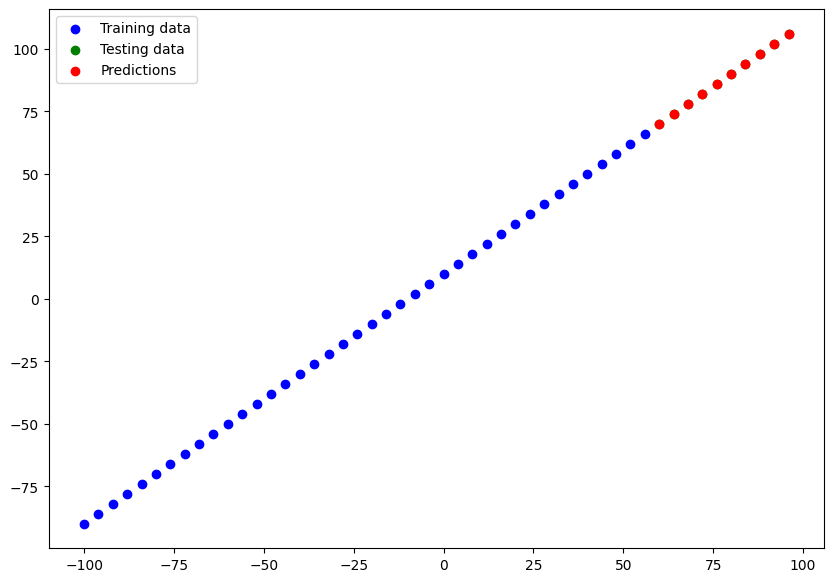

In [ ]:
#Let's refresh our model and plot it
tf.random.set_seed(42)
model_3 = tf.keras.Sequential( name="my_model")
model_3.add(tf.keras.layers.Dense(20, input_shape=[1], name="input_layer"))
#model_3.add(tf.keras.layers.Dense(20, activation="relu", name="hidden_layer"))
model_3.add(tf.keras.layers.Dense(1, activation="relu", name="output_layer"))

model_3.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    metrics=["mae", "mse"]
)

model_3.fit(X_train, y_train, epochs=500, verbose=0)

y_pred_3 = model_3.predict(X_test)

plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred_3
                 )


In [ ]:
mae_1 = tf.keras.losses.mae(y_test, tf.squeeze(y_pred_1))
mae_2 = tf.keras.losses.mae(y_test, tf.squeeze(y_pred_2))
mae_3 = tf.keras.losses.mae(y_test, tf.squeeze(y_pred_3))
mae_1, mae_2, mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=65.158066>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.4077997>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.392334e-06>)

### Comparing our experiments...

In [ ]:
import pandas as pd
mse_1 = tf.keras.losses.mse(y_test, tf.squeeze(y_pred_1))
mse_2 = tf.keras.losses.mse(y_test, tf.squeeze(y_pred_2))
mse_3 = tf.keras.losses.mse(y_test, tf.squeeze(y_pred_3))

model_results = [["Model_1", mae_1.numpy(), mse_1.numpy()],
                 ["Model_2", mae_2.numpy(), mse_2.numpy()],
                 ["Model_3", mse_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,Model_1,6.515807e+01,4.308862e+03
1,Model_2,6.407800e+00,4.459117e+01
2,Model_3,9.895303e-11,9.895303e-11


Comparing models is very tedious... but that's what this is all about! Expecially trying to figure out what DOESN"T work


Your main goal should be to minimize the time you spend on experiments. Get in the habit of tracking the results of your experiments - there are tools to help us, too!
* TensorBoard (built right in the tensorflow library)
* Weights & Biases (tool for tracking experiments all over, plugs into TensorBoard)

### Saving our models
How can we get Model 3 out of our notebook and into a production workflow?
* model.save(*fname*)
* tf.keras.models.load_model

In [ ]:
#Save model in SavedModel format
model_3.save("tensorflow_01_model_3_SavedModel")


In [ ]:
#HDF5 save format
model.save("tensorflow_01_model_3_HDF5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


SavedModel has a folder set, but the HDF5 version if just a file. HDF5 is often more useful when you want to load this model outside of TensorFlow in the future.

### Loading a saved model
Can we load the model back in?

In [ ]:
model_3_loaded = tf.keras.models.load_model("/content/tensorflow_01_model_3_SavedModel")
model_3_loaded.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#they're the same architecture, but what about the weights?
model_3_preds = model_3.predict(X_test)
model_3_loaded_preds = model_3_loaded.predict(X_test)
model_3_preds == model_3_loaded_preds

1/1 [==============================] - 0s 20ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_3_loaded_h5 = tf.keras.models.load_model("/content/tensorflow_01_model_3_HDF5.h5")
model_3_loaded_h5.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3_preds = model_3.predict(X_test)
model_3_loaded_h5_preds = model_3_loaded_h5.predict(X_test)
model_3_preds == model_3_loaded_h5_preds, model_3_preds, model_3_loaded_h5_preds

1/1 [==============================] - 0s 33ms/step


(array([[False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False]]),
 array([[ 70.00001 ],
        [ 74.      ],
        [ 78.00001 ],
        [ 82.00001 ],
        [ 86.000015],
        [ 90.00001 ],
        [ 94.000015],
        [ 98.      ],
        [102.00001 ],
        [106.000015]], dtype=float32),
 array([[ 70.     ],
        [ 74.     ],
        [ 78.00001],
        [ 82.     ],
        [ 86.     ],
        [ 90.00001],
        [ 94.     ],
        [ 98.     ],
        [102.00001],
        [106.     ]], dtype=float32))

## Let's go bigger!
Medical cost dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#we need to numerically encode everything before creating our model!
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#creating feasures and labels tensors
insurance_features = tf.constant(insurance_one_hot.loc[:, insurance_one_hot.columns != "charges"])
insurance_labels = tf.constant(insurance_one_hot["charges"])
insurance_features, insurance_labels


(<tf.Tensor: shape=(1338, 11), dtype=float64, numpy=
 array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
        [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
        ...,
        [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])>,
 <tf.Tensor: shape=(1338,), dtype=float64, numpy=
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603])>)

In [ ]:
#we're going to need an extra axis on those labels...
insurance_labels = tf.expand_dims(insurance_labels, axis=1)
insurance_labels

<tf.Tensor: shape=(1338, 1), dtype=float64, numpy=
array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])>

In [ ]:
#create train and test datasets
eightyP = round(len(insurance_features)*.8)
ins_feat_train = insurance_features[:eightyP]
ins_feat_test = insurance_features[eightyP:]
ins_label_train = insurance_labels[:eightyP]
ins_label_test = insurance_labels[eightyP:]
print("Split into", eightyP, "training items and", len(ins_feat_test), "tests.")

Split into 1070 training items and 268 tests.


In [ ]:
#create, compile, and fit model
ins_model = tf.keras.Sequential(name="insurance_model")
ins_model.add(tf.keras.layers.Dense(11, activation="relu", input_shape=[11, 1], name="inputs"))
ins_model.add(tf.keras.layers.Dense(20, activation="relu", name="hidden_1"))
ins_model.add(tf.keras.layers.Dense(20, activation="relu", name="hidden_2"))
ins_model.add(tf.keras.layers.Dense(1, name="output"))

ins_model.compile(loss=tf.keras.losses.mse,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae", "mse"])

ins_model.fit(ins_feat_train, ins_label_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 322297120.0000 - mae: 13340.6445 - mse: 322297120.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 322118144.0000 - mae: 13334.3574 - mse: 322118144.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 321761856.0000 - mae: 13321.7119 - mse: 321761856.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 321072896.0000 - mae: 13297.0361 - mse: 321072896.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 319844256.0000 - mae: 13252.0205 - mse: 319844256.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 317801728.0000 - mae: 13176.4746 - mse: 317801728.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 314712992.0000 - mae: 13058.4443 - mse: 314712992.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 310388448.0000 - mae: 12887.293

In [ ]:
#BUT there's an even better way to split these up before putting into tensors... sklearn!
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
#Let's rebuild a new network
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae", "mse"])

#note that we're not even reformatting these into tensors!
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8660.1143 - mae: 8660.1143 - mse: 188040208.0000
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7878.3652 - mae: 7878.3652 - mse: 167368320.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.7539 - mae: 7551.7539 - mse: 162448704.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7703.4653 - mae: 7703.4653 - mse: 166975744.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7623.0283 - mae: 7623.0283 - mse: 164363232.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7612.5151 - mae: 7612.5151 - mse: 162191040.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7580.2319 - mae: 7580.2319 - mse: 161324176.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7758.7295 - mae: 7758.7295 - mse: 162117840.0000
Epoch 9/100
34/34 [=====

In [ ]:
#how'd we do? evaluate using the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 5ms/step - loss: 8570.4639 - mae: 8570.4639 - mse: 107033112.0000


[8570.4638671875, 8570.4638671875, 107033112.0]

In [ ]:
#how bad is "off by 7000"?
7000/y_train.median(), 7000/y_train.mean()

(0.7310367424183997, 0.5244981967210136)

so... we need to improve our model...

In [ ]:
#my attempt
tf.random.set_seed(42)
matt_model_1=tf.keras.Sequential()
matt_model_1.add(tf.keras.layers.Dense(20, activation="relu"))
matt_model_1.add(tf.keras.layers.Dense(20, activation="relu"))
matt_model_1.add(tf.keras.layers.Dense(1))

matt_model_1.compile(loss=tf.keras.losses.mse, optimizer=tf.keras.optimizers.Adam(), metrics=["mae","mse"])

hist_1 = matt_model_1.fit(X_train, y_train, epochs=100, verbose=0)

matt_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 122504608.0000 - mae: 8956.0996 - mse: 122504608.0000


[122504608.0, 8956.099609375, 122504608.0]

In [ ]:
#mse sucks here, I guess. 2nd attempt
tf.random.set_seed(42)
matt_model_2=tf.keras.Sequential()
matt_model_2.add(tf.keras.layers.Dense(20, activation="relu"))
matt_model_2.add(tf.keras.layers.Dense(20, activation="relu"))
matt_model_2.add(tf.keras.layers.Dense(1))

matt_model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae","mse"])

hist_2 = matt_model_2.fit(X_train, y_train, epochs=100, verbose=0)

matt_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6308.1582 - mae: 6308.1582 - mse: 156478240.0000


[6308.158203125, 6308.158203125, 156478240.0]

In [ ]:
#what would SGD do?
tf.random.set_seed(42)
matt_model_3=tf.keras.Sequential()
matt_model_3.add(tf.keras.layers.Dense(20, activation="relu"))
matt_model_3.add(tf.keras.layers.Dense(20, activation="relu"))
matt_model_3.add(tf.keras.layers.Dense(1))

matt_model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae","mse"])

hist_3 = matt_model_3.fit(X_train, y_train, epochs=100, verbose=0)

matt_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8649.1738 - mae: 8649.1738 - mse: 166297936.0000


[8649.173828125, 8649.173828125, 166297936.0]

In [ ]:
#nah, Adam's better. More layers, and longer
tf.random.set_seed(42)
matt_model_4=tf.keras.Sequential()
matt_model_4.add(tf.keras.layers.Dense(100, activation="relu"))
matt_model_4.add(tf.keras.layers.Dense(20, activation="relu"))
matt_model_4.add(tf.keras.layers.Dense(1))

matt_model_4.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae","mse"])

hist_4 = matt_model_4.fit(X_train, y_train, epochs=200, verbose=0)

matt_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 3331.1685 - mae: 3331.1685 - mse: 45864584.0000


[3331.16845703125, 3331.16845703125, 45864584.0]

In [ ]:
#does the activation impact anything?
tf.random.set_seed(42)
matt_model_5=tf.keras.Sequential()
matt_model_5.add(tf.keras.layers.Dense(100))
matt_model_5.add(tf.keras.layers.Dense(20))
matt_model_5.add(tf.keras.layers.Dense(1))

matt_model_5.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae","mse"])

hist_5 = matt_model_5.fit(X_train, y_train, epochs=200, verbose=0)

matt_model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 9ms/step - loss: 3379.0808 - mae: 3379.0808 - mse: 37602284.0000


[3379.080810546875, 3379.080810546875, 37602284.0]

Text(0.5, 0, 'epochs')

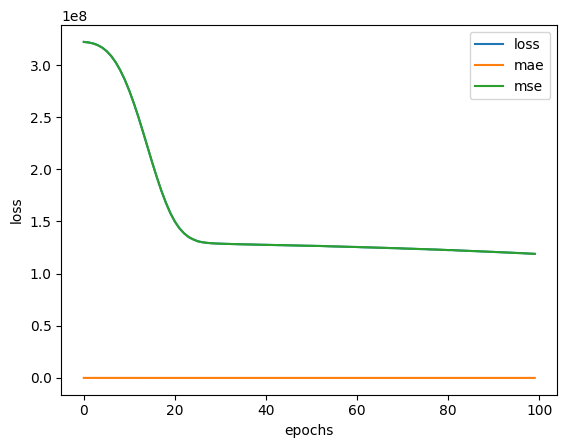

In [ ]:
#what are those history variables? the loss curves!
pd.DataFrame(hist_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

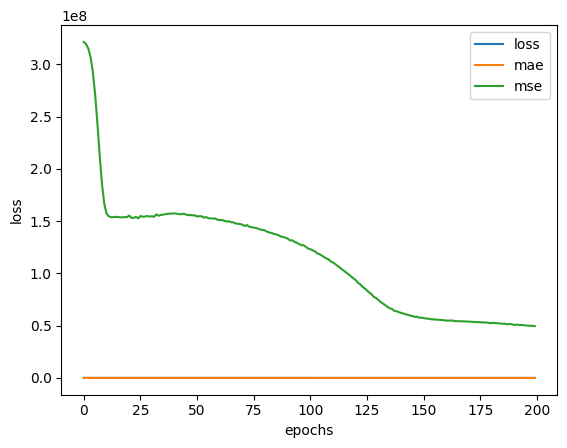

In [ ]:
#what about our best - try #4?
pd.DataFrame(hist_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

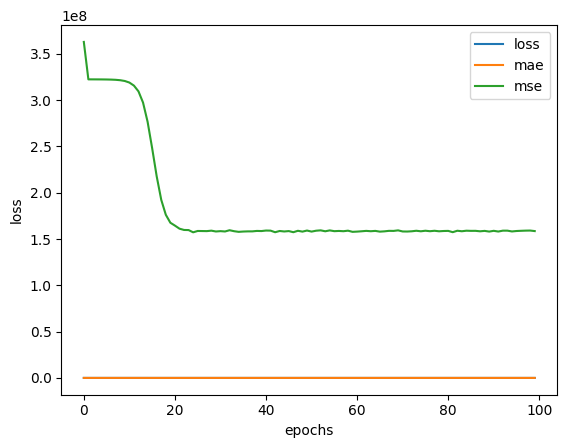

In [ ]:
#what about the worst one?
pd.DataFrame(hist_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How do we know where to stop? It's complex... but TensorFlow helps us find that using the `EarlyStopping Callback`, to stop training once a metric has flatlined

## Normalization and Standardization
How can we *scale* our features so that differences in ranges of values don't impact our model (e.g. age vs bmi)

<Axes: ylabel='Frequency'>

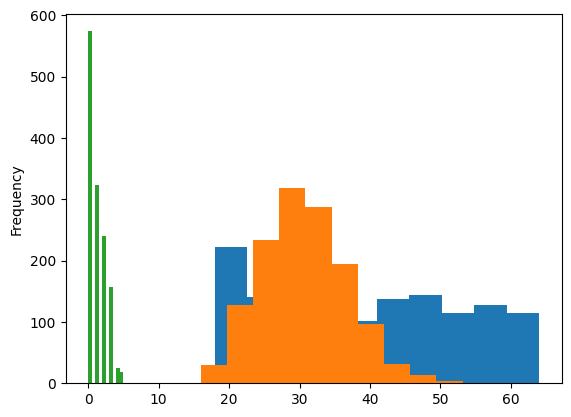

In [ ]:
X["age"].plot(kind="hist")
X["bmi"].plot(kind="hist")
X["children"].plot(kind="hist")

Normalization changes our values to a common range of values.
* **Normalization/Scale** - converts all values between 0 and 1 while preserving distribution, default scaler used by neural networks
* **Standardization** - removes the mean and divides each value by standard deviation, gives us more of a normal distribution to reduce the effect of outliers

`MinMaxScaler` vs `StandardScaler`

In [ ]:
#starting from scratch
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# scikit learn is helpful for data preparation
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn these columns into 0-1 - need to know this from our data
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) #onehot encode these columns
)

# create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# build out train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# fit the column transformer to training data AFTER separating training and test data
ct.fit(X_train)

#Transform our training and test data with the normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


# waht does that look like?
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#how have our shapes changed?
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

... let's get to neuraling out network!

9/9 [==============================] - 0s 3ms/step - loss: 3160.3386 - mae: 3160.3386


<Axes: >

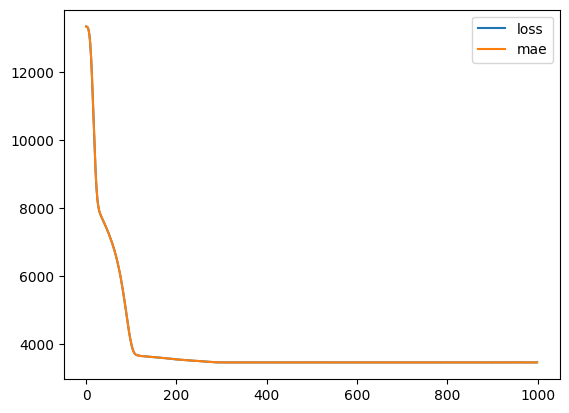

In [ ]:
tf.random.set_seed(42)
better_model = tf.keras.Sequential()
better_model.add(tf.keras.layers.Dense(20))
better_model.add(tf.keras.layers.Dense(20))
better_model.add(tf.keras.layers.Dense(1))

better_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

better_model_history = better_model.fit(X_train_normal, y_train, epochs=1000, verbose=0)

better_model.evaluate(X_test_normal, y_test)
pd.DataFrame(better_model_history.history).plot()

9/9 [==============================] - 0s 3ms/step - loss: 3161.1724 - mae: 3161.1724


<Axes: >

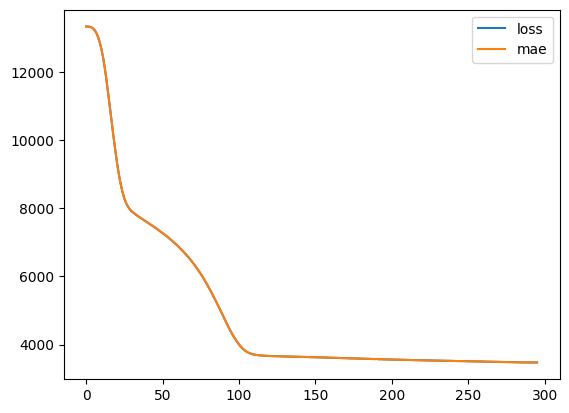

In [ ]:
# how can we get it to stop when we hit that flatline?
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

# same code above as below

tf.random.set_seed(42)
better_model = tf.keras.Sequential()
better_model.add(tf.keras.layers.Dense(20))
better_model.add(tf.keras.layers.Dense(20))
better_model.add(tf.keras.layers.Dense(1))

better_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

better_model_history = better_model.fit(X_train_normal, y_train, epochs=1000, verbose=0, callbacks=[callback])

better_model.evaluate(X_test_normal, y_test)
pd.DataFrame(better_model_history.history).plot()